Analyzing publicly available data on traffic accidents in NYC from 2009-2016 (this is still a work in progress).

In [162]:
%matplotlib inline 

import numpy as np
import pandas as pd
from collections import defaultdict
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from ggplot import *

In [ ]:
def make_int(i):
    """
    Make strings into integers
    """
    if i == '':
        return None
    else:
        return int(i)
    
def group_data(data, key_name):
    """
    Building a dict of lists
    """
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def cleanup(dic):
    """Make string years into integers and have them in a sorted (by year) list"""
    year, total = zip(*(sorted(dic.items())))
    return list(map(int,year)), total

def describe_data(data):
    """Describe data"""
    print('Mean:', np.mean(data))
    print('Std:', np.std(data))
    print('Min:', np.min(data))
    print('Max:', np.max(data))

In [ ]:
with open('fatality_monthly.csv') as f:
    reader = csv.DictReader(f)
    records = list(reader)

In [76]:
for record in records:
    record['Fatalities'] = make_int(record['Fatalities'])
    record['PedFatalit'] = make_int(record['PedFatalit'])
    record['BikeFatali'] = make_int(record['BikeFatali'])
    record['MVOFatalit'] = make_int(record['MVOFatalit'])

# Group by year
accidents_by_year = group_data(records, 'YR') 

In [7]:
# Deleting 2016 because we don't have complete records.
del accidents_by_year['2016']

### Fatalities by year

In [18]:
total_by_year = sum_grouped_items(accidents_by_year, 'Fatalities')
total_bike_by_year = sum_grouped_items(accidents_by_year, 'BikeFatali')
total_ped_by_year = sum_grouped_items(accidents_by_year, 'PedFatalit')
total_mvo_by_year = sum_grouped_items(accidents_by_year, 'MVOFatalit')

Total fatalities by year

In [122]:
total_fatalities = total_by_year.values()
describe_data(list(total_fatalities))

Mean: 220.428571429
Std: 19.1971511492
Min: 191
Max: 255


The mean number of fatalities from 2009 - 2015 was about 220.

([<matplotlib.axis.XTick at 0x11e06cfd0>,
 <a list of 7 Text xticklabel objects>)

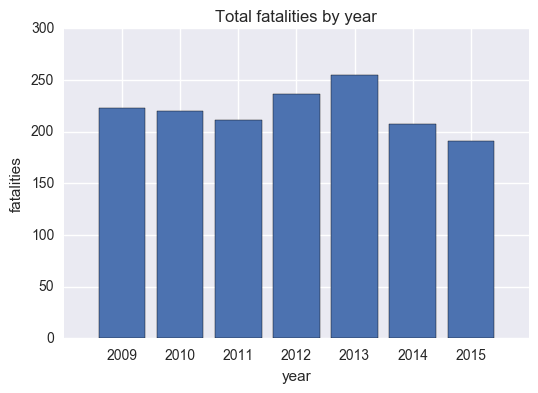

In [141]:
total_by_year_list = cleanup(total_by_year)

plt.bar(range(len(total_by_year_list[0])),total_by_year_list[1],align='center')
plt.title('Total fatalities by year')
plt.ylabel('fatalities')
plt.xlabel('year')
plt.xticks(range(len(total_by_year_list[0])),total_by_year_list[0])

### Bike fatalities by year

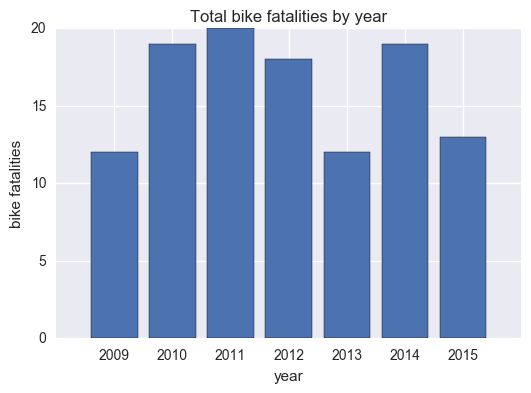

In [115]:
total_bike_by_year_list = cleanup(total_bike_by_year)

plt.bar(range(len(total_bike_by_year_list[0])),total_bike_by_year_list[1],align='center')
plt.xticks(range(len(total_bike_by_year_list[0])),total_bike_by_year_list[0])
plt.title('Total bike fatalities by year')
plt.xlabel('year')
plt.ylabel('bike fatalities')

### Pedestrian fatalities by year

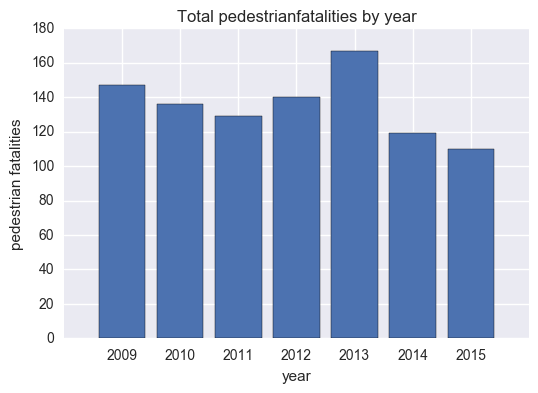

In [117]:
total_ped_by_year_list = cleanup(total_ped_by_year)

plt.bar(range(len(total_ped_by_year_list[0])),total_ped_by_year_list[1],align='center')
plt.xticks(range(len(total_ped_by_year_list[0])),total_ped_by_year_list[0])

plt.title('Total pedestrianfatalities by year')
plt.xlabel('year')
plt.ylabel('pedestrian fatalities')

### Motor vehicle fatalities by year

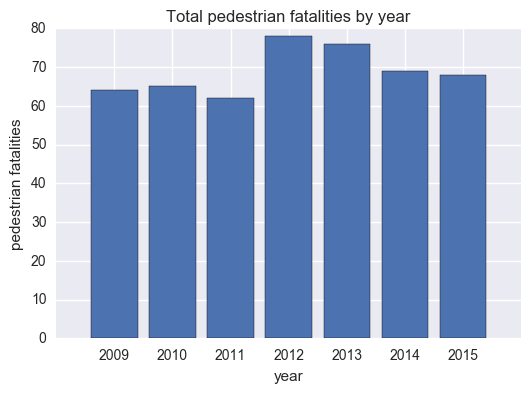

In [121]:
total_mvo_by_year_list = cleanup(total_mvo_by_year)
plt.bar(range(len(total_mvo_by_year_list[0])),total_mvo_by_year_list[1],align='center')
plt.xticks(range(len(total_mvo_by_year_list[0])),total_mvo_by_year_list[0])

plt.title('Total pedestrian fatalities by year')
plt.xlabel('year')
plt.ylabel('pedestrian fatalities')

### Fatalities by type as a percentage of total

In [123]:
total_year_s = pd.Series(total_by_year)
total_bike_year_s = pd.Series(total_bike_by_year)
total_ped_year_s = pd.Series(total_ped_by_year)
total_mvo_year_s = pd.Series(total_mvo_by_year)

def percent_of_total(specific,total):
    return (specific/total)*100

In [170]:
bike_percent = percent_of_total(total_bike_year_s, total_year_s)
ped_percent = percent_of_total(total_ped_year_s, total_year_s)
mvo_percent = percent_of_total(total_mvo_year_s, total_year_s)

print(bike)
print(ped)
print(mvo)

2009    5.381166
2010    8.636364
2011    9.478673
2012    7.627119
2013    4.705882
2014    9.178744
2015    6.806283
dtype: float64
2009    28.699552
2010    29.545455
2011    29.383886
2012    33.050847
2013    29.803922
2014    33.333333
2015    35.602094
dtype: float64
2009    28.699552
2010    29.545455
2011    29.383886
2012    33.050847
2013    29.803922
2014    33.333333
2015    35.602094
dtype: float64


In [127]:
# Check that the percentanges add to 100
bike_pct = pd.Series(bike_percent)
ped_pct = pd.Series(ped_percent)
mvo_pct = pd.Series(mvo_percent)

bike_pct + ped_pct + mvo_pct

2009    100.0
2010    100.0
2011    100.0
2012    100.0
2013    100.0
2014    100.0
2015    100.0
dtype: float64

### Fatalities by type in one plot

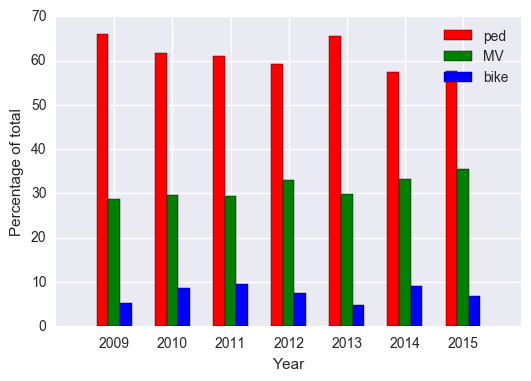

In [179]:
multiple_bars=plt.figure()
x=[2009,2010,2011,2012,2013,2014,2015]
ind=np.arange(len(x))
bike=bike_percent
ped=ped_percent
mvo=mvo_percent

ax.set_title('Percentage of fatalities by type')

ax=plt.subplot(111)
ax.bar(ind-.2, ped, width=.2, color='r', align='center', label='ped')
ax.bar(ind, mvo, width=.2, color='g', align='center', label='MV')
ax.bar(ind+.2, bike, width=.2, color='b', align='center', label='bike')

ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.set_ylabel('Percentage of total')
ax.set_xlabel('Year')
ax.legend(loc='best')

### Mapping fatalities

In [137]:
fatalities = pd.read_csv('fatality_monthly.csv')

# Delete all 2016 entries and group by year
fatalities_subset = fatalities[fatalities.YR !=2016]
grouped_year = fatalities_subset.groupby('YR')

### Using latitide/longitude data to map fatalities

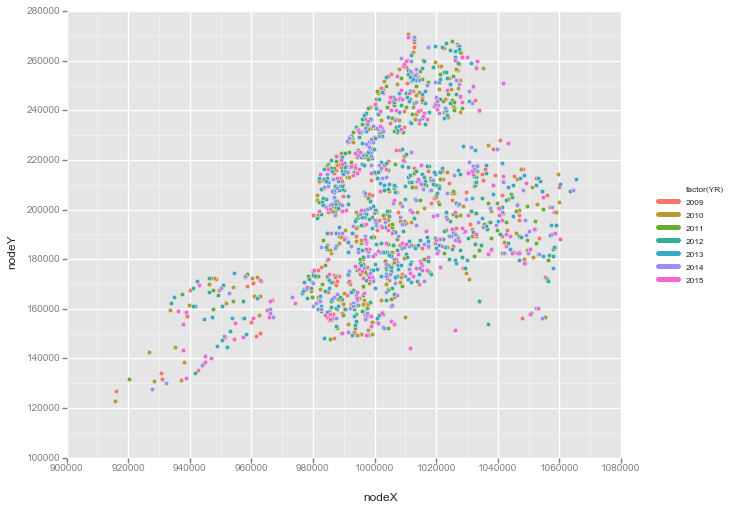

<ggplot: (-9223372036561988720)>


In [76]:
df = pd.DataFrame({'nodeX':fatalities_subset.loc[:,'nodeX'],
                   'nodeY':fatalities_subset.loc[:,'nodeY'],
                   'YR':fatalities_subset.loc[:,'YR']})

# NYC map of fatalitites from 2009-2015
print(ggplot(aes(x='nodeX', y='nodeY', color='factor(YR)'), data=df) + geom_point())

## Trends

What's interesting here is that we can look at this data to see if Vision Zero a project aimed to increase traffic safety, has made a difference. Now this is a bit hard to analyze without other data- for example, if we look at the total number of bike fatalities after 2013, there was actually a spike. But is this because the total number of bikers increased? We would need number of bike fatalities as a proportion of total bikers. The same goes for pedestrian and motor vehicle data.

Next on the agenda: trends over time/time series analysis...